# Welcome to the Machine Learning Capstone Project

## Introduction

This project is part of the Machine Learning Capstone and focuses on applying **supervised learning techniques** to solve a real-world business problem: **credit default risk prediction**.

The objective is to provide **risk evaluation as a service** for retail banks by leveraging machine learning to classify loan applicants based on their likelihood to default. The dataset used for this project comes from [Home Credit Group](https://www.kaggle.com/competitions/home-credit-default-risk), which offers financial services to underbanked populations. The data includes rich client information, from demographic and financial data to behavioral patterns.


## Problem Statement

The goal is to **build a classification model** that can distinguish between loan applicants who are likely to default and those who are not. The model will serve as a core component of a startup product offering for banks, helping them make better lending decisions while maintaining inclusivity.

## Proposed Solution

To tackle this challenge, the project employs a structured, end-to-end data science workflow:

- **Exploratory Data Analysis (EDA)**: Understand the structure of the dataset and uncover relationships and patterns that may inform modeling.
- **Advanced Feature Engineering**: Design and derive meaningful variables from raw data to boost model performance.
- **Model Selection & Tuning**: Test multiple machine learning algorithms and fine-tune them using techniques such as cross-validation and hyperparameter optimization.
- **Model Deployment**: Deploy the final model to Google Cloud Platform (GCP) with an HTTP interface, making it accessible for real-world use.

## Project Approach & Objectives

This notebook documents the structured approach followed throughout the project:

1. **Data Merging**  
   Combine seven related datasets into a single, unified dataset. This step mimics real-world data modeling and joins, typically performed in production environments (e.g., SQL or ELT pipelines).

2. **Data Preprocessing**  
   Clean and preprocess the merged dataset by handling missing values, encoding categorical variables, and addressing outliers.

3. **Exploratory Data Analysis (EDA)**  
   Perform in-depth data analysis to better understand feature distributions, spot anomalies, detect correlations, and guide feature selection.

4. **Machine Learning Modeling**  
   This is the core part of the project. It involves applying supervised learning models, engineering features, evaluating model performance, and tuning hyperparameters.

5. **Model Deployment to GCP**  
   As part of the capstone requirements, the final model is deployed to Google Cloud Platform and made accessible via an HTTP endpoint, demonstrating real-world application readiness.


## Real-World Application

In a production setting, the initial data merging and transformation process would likely be handled by data engineers through SQL-based data pipelines. This notebook simulates that data preparation stage, followed by the machine learning pipeline and deployment workflow handled by data scientists or ML engineers.

By building this proof-of-concept, the project demonstrates how raw loan data can be transformed into actionable business insights via machine learning.

In [1]:
import numpy as np
import pandas as pd
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
file_path = "data/"

test_df = pd.read_csv(f"{file_path}application_test.csv")
df = pd.read_csv(f"{file_path}application_train.csv")
bureau = pd.read_csv(f"{file_path}bureau.csv")
bureau_balance = pd.read_csv(f"{file_path}bureau_balance.csv")
credit_card = pd.read_csv(f"{file_path}credit_card_balance.csv")
pos_cash = pd.read_csv(f"{file_path}POS_CASH_balance.csv")
prev_app = pd.read_csv(f"{file_path}previous_application.csv")
install = pd.read_csv(f"{file_path}installments_payments.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Description

The dataset consists of **seven interconnected data sources**, each providing complementary information about Home Credit loan applicants. Together, these datasets offer a rich, multi-table structure that simulates real-world financial data environments.

### 1. `application_train` / `application_test`
These are the **core datasets** used for model training and prediction. Each row represents a loan application, uniquely identified by the `SK_ID_CURR` key.

- `application_train` includes a `TARGET` column:  
  - `0`: Loan was fully repaid  
  - `1`: Loan was not repaid (default)
- `application_test` does not contain the `TARGET` column and is used for model inference.

### 2. `bureau`
Contains **information on the client’s previous credit history** from **external financial institutions**. A single applicant (`SK_ID_CURR`) may have multiple prior credits (`SK_ID_BUREAU`).

### 3. `bureau_balance`
Provides **monthly status updates** for each credit record in the `bureau` dataset. Each row corresponds to **one month** of a previous credit's lifetime.

### 4. `previous_application`
Details **all previous loan applications** a client submitted to Home Credit. Each prior application is represented by a row identified by `SK_ID_PREV`. Clients may have submitted multiple previous applications.

### 5. `POS_CASH_BALANCE`
Captures **monthly balances** for **Point-of-Sale (POS) and cash loans** previously issued by Home Credit. Each loan can have many rows—one for each month of its active duration.

### 6. `credit_card_balance`
Provides **monthly credit card balance data** for each client with a Home Credit-issued credit card. Like POS loans, each credit card may generate many monthly records.

### 7. `installments_payments`
Contains the **payment history** for previously approved Home Credit loans. Each row represents an **actual or missed installment**, allowing detailed analysis of client payment behavior.

### 🔗 Data Relationships Overview

The datasets are **relationally linked** through shared keys such as:

- `SK_ID_CURR`: Primary key for each client (in `application_train/test`)
- `SK_ID_BUREAU`: Connects `bureau` to `bureau_balance`
- `SK_ID_PREV`: Links `application_train`/`previous_application` to other tables like `POS_CASH_BALANCE`, `credit_card_balance`, and `installments_payments`

Together, these datasets form a **hierarchical structure**, where each loan application aggregates detailed historical and behavioral data from multiple sources. This enables rich feature engineering for machine learning models.
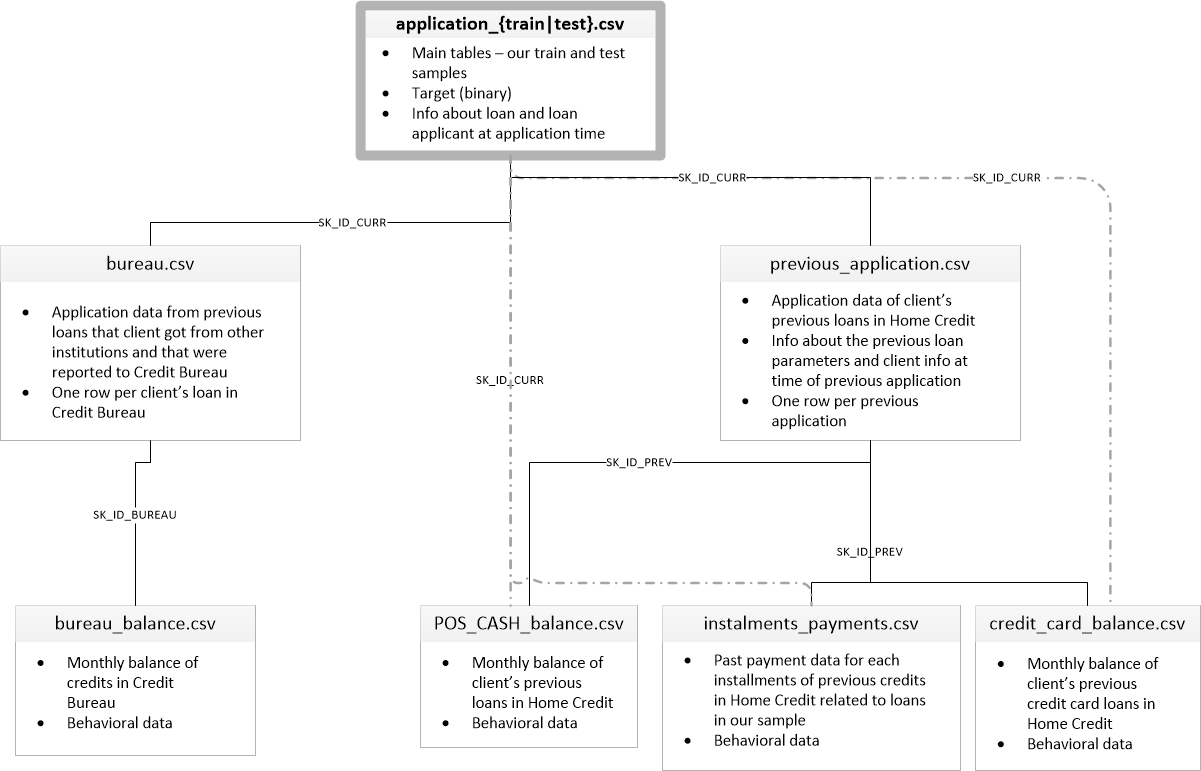

#### Description of the columns

In [4]:
desc = pd.read_csv('data/HomeCredit_columns_description.csv', encoding='Latin-1', index_col = 0)
desc.head()

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


## Strategy Overview

To handle the complexity of the dataset, the goal is to consolidate all relevant information into a single client-level dataset for modeling. This involves aggregating supporting datasets at the `SK_ID_CURR` level and merging them with the main application data.

### Processing Order:
1. `previous_application`
2. `credit_card_balance`
3. `bureau`
4. `bureau_balance`
5. `POS_CASH_BALANCE`
6. `installments_payments`

### Selected Features from `previous_application`

From the `previous_application` table, the following features were selected for aggregation:

#### Numerical Features (aggregated using `mean`, `sum`):
- `AMT_ANNUITY`
- `AMT_CREDIT`
- `DAYS_DECISION`
- `CNT_PAYMENT`
- `RATE_DOWN_PAYMENT`
- `DAYS_LAST_DUE`
- `DAYS_TERMINATION`

#### Categorical Features (aggregated using `mode`):
- `NAME_CONTRACT_STATUS`
- `PRODUCT_COMBINATION`
- `NAME_YIELD_GROUP`

These aggregated features will be merged into the main application dataset to enhance model performance.

In [5]:
agg_funs = {
    'SK_ID_CURR': 'count',
    'AMT_ANNUITY': ['mean', 'sum'],
    'AMT_CREDIT': ['mean', 'sum'],
    'DAYS_DECISION': ['mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
    'RATE_DOWN_PAYMENT': ['mean'],
    'DAYS_LAST_DUE': ['mean'],
    'DAYS_TERMINATION': ['mean']
}

prev_apps = prev_app.groupby('SK_ID_CURR').agg(agg_funs)
prev_apps.columns = ['_'.join(col).upper() for col in prev_apps.columns.values]

mode_features = ['NAME_CONTRACT_STATUS', 'PRODUCT_COMBINATION', 'NAME_YIELD_GROUP']
mode_aggregations = prev_app.groupby('SK_ID_CURR')[mode_features].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

status_counts = prev_app.groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0)
status_counts.columns = ['STATUS_' + col.upper() + '_COUNT' for col in status_counts.columns]

final_prev_apps = prev_apps.join(mode_aggregations).join(status_counts)
final_prev_apps.columns = [col + '_PRV' for col in final_prev_apps.columns]

In [6]:
final_prev_apps.head()

,SK_ID_CURR_COUNT_PRV,AMT_ANNUITY_MEAN_PRV,AMT_ANNUITY_SUM_PRV,AMT_CREDIT_MEAN_PRV,AMT_CREDIT_SUM_PRV,DAYS_DECISION_MEAN_PRV,CNT_PAYMENT_MEAN_PRV,CNT_PAYMENT_SUM_PRV,RATE_DOWN_PAYMENT_MEAN_PRV,DAYS_LAST_DUE_MEAN_PRV,DAYS_TERMINATION_MEAN_PRV,NAME_CONTRACT_STATUS_PRV,PRODUCT_COMBINATION_PRV,NAME_YIELD_GROUP_PRV,STATUS_APPROVED_COUNT_PRV,STATUS_CANCELED_COUNT_PRV,STATUS_REFUSED_COUNT_PRV,STATUS_UNUSED OFFER_COUNT_PRV
SK_ID_CURR,,,,,,,,,,,,,,,,,,
100001,1,3951.000,3951.000,23787.00,23787.0,-1740.0,8.0,8.0,0.104326,-1619.000000,-1612.000000,Approved,POS mobile with interest,high,1,0,0,0
100002,1,9251.775,9251.775,179055.00,179055.0,-606.0,24.0,24.0,0.000000,-25.000000,-17.000000,Approved,POS other with interest,low_normal,1,0,0,0
100003,3,56553.990,169661.970,484191.00,1452573.0,-1305.0,10.0,30.0,0.050030,-1054.333333,-1047.333333,Approved,Cash X-Sell: low,middle,3,0,0,0
100004,1,5357.250,5357.250,20106.00,20106.0,-815.0,4.0,4.0,0.212008,-724.000000,-714.000000,Approved,POS mobile without interest,middle,1,0,0,0
100005,2,4813.200,4813.200,20076.75,40153.5,-536.0,12.0,12.0,0.108964,-466.000000,-460.000000,Approved,Cash,XNA,1,1,0,0


### Selected Features from `credit_card_balance`

From the `credit_card_balance` dataset, the following features have been selected for aggregation:

#### Numerical Features:
- `AMT_BALANCE`
- `AMT_CREDIT_LIMIT_ACTUAL`
- `AMT_DRAWINGS_CURRENT`
- `AMT_PAYMENT_CURRENT`
- `CNT_DRAWINGS_CURRENT`
- `SK_DPD` *(number of days past due)*

#### Categorical Feature:
- `NAME_CONTRACT_STATUS`

These features will be aggregated (e.g., using `mean`, `sum`, and `mode` where applicable) and joined to the main dataset at the applicant level.

In [7]:
numeric_features = [
    'AMT_BALANCE',
    'AMT_CREDIT_LIMIT_ACTUAL',
    'AMT_DRAWINGS_CURRENT',
    'AMT_PAYMENT_CURRENT',
    'CNT_DRAWINGS_CURRENT',
    'SK_DPD'
]

categorical_feature = 'NAME_CONTRACT_STATUS'

numeric_agg = credit_card.groupby('SK_ID_CURR')[numeric_features].mean()

most_recent_index = credit_card.groupby('SK_ID_CURR')['MONTHS_BALANCE'].idxmax()

categorical_agg = credit_card.loc[most_recent_index, ['SK_ID_CURR', categorical_feature]].set_index('SK_ID_CURR')

final_credit_agg = numeric_agg.join(categorical_agg)

final_credit_agg.columns = [col + '_CREDIT-CARD' for col in final_credit_agg.columns]

In [8]:
final_credit_agg.head()

,AMT_BALANCE_CREDIT-CARD,AMT_CREDIT_LIMIT_ACTUAL_CREDIT-CARD,AMT_DRAWINGS_CURRENT_CREDIT-CARD,AMT_PAYMENT_CURRENT_CREDIT-CARD,CNT_DRAWINGS_CURRENT_CREDIT-CARD,SK_DPD_CREDIT-CARD,NAME_CONTRACT_STATUS_CREDIT-CARD
SK_ID_CURR,,,,,,,
100006,0.000000,270000.000000,0.000000,NaN,0.000000,0.000000,Active
100011,54482.111149,164189.189189,2432.432432,4843.064189,0.054054,0.000000,Active
100013,18159.919219,131718.750000,5953.125000,7168.346250,0.239583,0.010417,Active
100021,0.000000,675000.000000,0.000000,NaN,0.000000,0.000000,Completed
100023,0.000000,135000.000000,0.000000,NaN,0.000000,0.000000,Active


### Selected Features from `bureau`

From the `bureau` dataset, the following features have been selected for aggregation at the client level:

#### Numerical Features:
- `CREDIT_DAY_OVERDUE`
- `DAYS_CREDIT_ENDDATE`
- `AMT_CREDIT_SUM`
- `AMT_CREDIT_SUM_DEBT`
- `AMT_CREDIT_SUM_OVERDUE`
- `CNT_CREDIT_PROLONG`

#### Categorical Feature:
- `CREDIT_ACTIVE`

In [9]:
numeric_features = [
    'CREDIT_DAY_OVERDUE',
    'DAYS_CREDIT_ENDDATE',
    'AMT_CREDIT_SUM',
    'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_OVERDUE',
    'CNT_CREDIT_PROLONG'
]

categorical_feature = 'CREDIT_ACTIVE'

numeric_agg = bureau.groupby('SK_ID_CURR')[numeric_features].mean()

last_agg = bureau.groupby('SK_ID_CURR')[categorical_feature].last()

final_bureau_agg = numeric_agg.join(last_agg)

final_bureau_agg.columns = [col + '_BUR' for col in final_bureau_agg.columns]

In [10]:
final_bureau_agg.head()

,CREDIT_DAY_OVERDUE_BUR,DAYS_CREDIT_ENDDATE_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,CNT_CREDIT_PROLONG_BUR,CREDIT_ACTIVE_BUR
SK_ID_CURR,,,,,,,
100001,0.0,82.428571,207623.571429,85240.928571,0.0,0.0,Active
100002,0.0,-349.000000,108131.945625,49156.200000,0.0,0.0,Closed
100003,0.0,-544.500000,254350.125000,0.000000,0.0,0.0,Active
100004,0.0,-488.500000,94518.900000,0.000000,0.0,0.0,Closed
100005,0.0,439.333333,219042.000000,189469.500000,0.0,0.0,Active


### Selected Features from `POS_CASH_BALANCE`

From the `POS_CASH_BALANCE` dataset, the goal is to extract the most recent information for each client. Therefore, we will focus on the **latest month** of data per client and select the following features:

#### Features to Extract (Last Month Only):
- `CNT_INSTALMENT` – Number of installments for the loan.
- `CNT_INSTALMENT_FUTURE` – Remaining number of future installments.
- `NAME_CONTRACT_STATUS` – Current contract status.
- `SK_DPD` – Days past due.
- `SK_DPD_DEF` – Days past due with a default.

These values will be taken from the most recent month (`MONTHS_BALANCE`), and merged into the final dataset at the client level.

In [11]:
most_recent_index = pos_cash.groupby('SK_ID_CURR')['MONTHS_BALANCE'].idxmax()

final_latest_pos_cash = pos_cash.loc[most_recent_index, [
    'SK_ID_CURR', 
    'CNT_INSTALMENT', 
    'CNT_INSTALMENT_FUTURE', 
    'NAME_CONTRACT_STATUS', 
    'SK_DPD', 
    'SK_DPD_DEF'
]].set_index('SK_ID_CURR')

final_latest_pos_cash.columns = [col + '_POS' for col in final_latest_pos_cash.columns]
final_latest_pos_cash.head()

,CNT_INSTALMENT_POS,CNT_INSTALMENT_FUTURE_POS,NAME_CONTRACT_STATUS_POS,SK_DPD_POS,SK_DPD_DEF_POS
SK_ID_CURR,,,,,
100001,4.0,0.0,Completed,0,0
100002,24.0,6.0,Active,0,0
100003,7.0,0.0,Completed,0,0
100004,3.0,0.0,Completed,0,0
100005,9.0,0.0,Completed,0,0


### Installment Payments

This section calculates the number of on-time and late installment payments for each user (`SK_ID_CURR`) in the `installments_payments` dataset.  
A payment is considered **late** if `DAYS_ENTRY_PAYMENT < DAYS_INSTALMENT`.  
The result includes:
- `NUM_LATE_PAYMENTS`: total late payments
- `NUM_ON_TIME_PAYMENTS`: total on-time payments

In [12]:
# Flag whether each payment was on time
install['IS_ON_TIME'] = install['DAYS_ENTRY_PAYMENT'] <= install['DAYS_INSTALMENT']

# Aggregate: Count of on-time and late payments per customer
final_install_agg = install.groupby('SK_ID_CURR')['IS_ON_TIME'].agg([
    ('COUNT_ON_TIME_PAYMENTS', lambda x: x.sum()),
    ('COUNT_LATE_PAYMENTS', lambda x: (~x).sum())
])

# Rename columns to reflect their source
final_install_agg.columns = [f'{col}_INST' for col in final_install_agg.columns]

# Preview
final_install_agg.head()

,COUNT_ON_TIME_PAYMENTS_INST,COUNT_LATE_PAYMENTS_INST
SK_ID_CURR,,
100001,6,1
100002,19,0
100003,25,0
100004,3,0
100005,8,1


### Final Data Merge

In [13]:
df.shape, final_prev_apps.shape, final_credit_agg.shape, final_bureau_agg.shape, final_latest_pos_cash.shape, final_install_agg.shape

((307511, 122),
 (338857, 18),
 (103558, 7),
 (305811, 7),
 (337252, 5),
 (339587, 2))

In [14]:
merged_df = df.merge(final_prev_apps, on='SK_ID_CURR', how='left')
merged_df = merged_df.merge(final_credit_agg, on='SK_ID_CURR', how='left')
merged_df = merged_df.merge(final_bureau_agg, on='SK_ID_CURR', how='left')
merged_df = merged_df.merge(final_latest_pos_cash, on='SK_ID_CURR', how='left')
merged_df = merged_df.merge(final_install_agg, on='SK_ID_CURR', how='left')

print("Final merged shape:", merged_df.shape)
merged_df.head()

Final merged shape: (307511, 161)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR_COUNT_PRV,AMT_ANNUITY_MEAN_PRV,AMT_ANNUITY_SUM_PRV,AMT_CREDIT_MEAN_PRV,AMT_CREDIT_SUM_PRV,DAYS_DECISION_MEAN_PRV,CNT_PAYMENT_MEAN_PRV,CNT_PAYMENT_SUM_PRV,RATE_DOWN_PAYMENT_MEAN_PRV,DAYS_LAST_DUE_MEAN_PRV,DAYS_TERMINATION_MEAN_PRV,NAME_CONTRACT_STATUS_PRV,PRODUCT_COMBINATION_PRV,NAME_YIELD_GROUP_PRV,STATUS_APPROVED_COUNT_PRV,STATUS_CANCELED_COUNT_PRV,STATUS_REFUSED_COUNT_PRV,STATUS_UNUSED OFFER_COUNT_PRV,AMT_BALANCE_CREDIT-CARD,AMT_CREDIT_LIMIT_ACTUAL_CREDIT-CARD,AMT_DRAWINGS_CURRENT_CREDIT-CARD,AMT_PAYMENT_CURRENT_CREDIT-CARD,CNT_DRAWINGS_CURRENT_CREDIT-CARD,SK_DPD_CREDIT-CARD,NAME_CONTRACT_STATUS_CREDIT-CARD,CREDIT_DAY_OVERDUE_BUR,DAYS_CREDIT_ENDDATE_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,CNT_CREDIT_PROLONG_BUR,CREDIT_ACTIVE_BUR,CNT_INSTALMENT_POS,CNT_INSTALMENT_FUTURE_POS,NAME_CONTRACT_STATUS_POS,SK_DPD_POS,SK_DPD_DEF_POS,COUNT_ON_TIME_PAYMENTS_INST,COUNT_LATE_PAYMENTS_INST
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9251.775,9251.775,179055.00,179055.0,-606.000000,24.000000,24.0,0.000000,-25.000000,-17.000000,Approved,POS other with interest,low_nor

In [15]:
merged_df.to_csv('data/merged_data.csv', index=False)

#### Merging Test data 

In [16]:
test_df = test_df.merge(final_prev_apps, on='SK_ID_CURR', how='left')
test_df = test_df.merge(final_credit_agg, on='SK_ID_CURR', how='left')
test_df = test_df.merge(final_bureau_agg, on='SK_ID_CURR', how='left')
test_df = test_df.merge(final_latest_pos_cash, on='SK_ID_CURR', how='left')
test_df = test_df.merge(final_install_agg, on='SK_ID_CURR', how='left')

In [17]:
test_df.to_csv('data/merged_test_data.csv', index=False)